In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bakimdurusanalizyapilacak.csv', delimiter=';', skiprows=0, low_memory=False)


df.head()

# veri tiplerine bakıyoruz


In [3]:
df.dtypes

Makine                       object
Stok kodu                    object
Başlangıç Tarih              object
Bitiş Tarih                  object
Personel                     object
Arıza Grup 1                 object
Arıza Grup 2                 object
Arıza Grup 3                 object
Çalışma Süresi(Dk) Toplam     int64
yıl                           int64
tezgah                       object
dtype: object

In [4]:
df.shape

(2000, 11)

# Eksik Değerlerin İncelenmesi

In [5]:
df.isnull().sum()

Makine                         0
Stok kodu                      0
Başlangıç Tarih                0
Bitiş Tarih                    0
Personel                       0
Arıza Grup 1                   0
Arıza Grup 2                   0
Arıza Grup 3                 758
Çalışma Süresi(Dk) Toplam      0
yıl                            0
tezgah                         0
dtype: int64

# Kategorik Değişkenler ve Özetleri

In [6]:
kat_df = df.select_dtypes(include = ["object"])

In [7]:
kat_df.head()

,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,tezgah
0,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 03:52,12.01.2018 03:59,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,C 02
1,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:00,12.01.2018 04:02,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,C 02
2,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:02,12.01.2018 04:22,GÖKHAN GÖK,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK",C 02
3,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,5.02.2018 23:40,5.02.2018 23:57,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,C 02
4,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,30.03.2018 14:22,30.03.2018 14:33,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,C 02


In [8]:
kat_df.Makine.unique()

array(['(C 02) MAZAK QT-28N (TORNA)', '(C 10) MAZAK QT-28N (TORNA)',
       '(C 100) MAZAK QTN-II-200 (TORNA)',
       '(C 101) MAZAK QTN-II-150 (TORNA)',
       '(C 102) MAZAK QTN-II-150 (TORNA)',
       '(C 103) MAZAK QTN-II-150 (TORNA)', '(C 105) MAZAK HCN-5000 (YİM)',
       '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)',
       '(C 108) MAZAK QTN-250 II (TORNA)',
       '(C 109) MAZAK QTN-250 II (TORNA)',
       '(C 110) MAZAK VTC-200-C (DİM)', '(C 112) MAZAK HCN-6800 II (YİM)'],
      dtype=object)

In [9]:
kat_df["Makine"].value_counts()

(C 112) MAZAK HCN-6800 II (YİM)          591
(C 102) MAZAK QTN-II-150 (TORNA)         354
(C 110) MAZAK VTC-200-C (DİM)            291
(C 101) MAZAK QTN-II-150 (TORNA)         149
(C 02) MAZAK QT-28N (TORNA)              137
(C 103) MAZAK QTN-II-150 (TORNA)         125
(C 10) MAZAK QT-28N (TORNA)              104
(C 107) LİMİT KGS16324HO (NC TAŞLAMA)     63
(C 105) MAZAK HCN-5000 (YİM)              55
(C 109) MAZAK QTN-250 II (TORNA)          53
(C 100) MAZAK QTN-II-200 (TORNA)          48
(C 108) MAZAK QTN-250 II (TORNA)          30
Name: Makine, dtype: int64

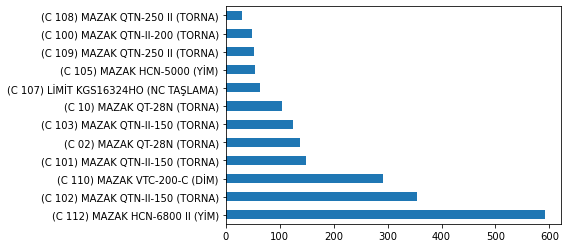

In [10]:
df["Makine"].value_counts().plot.barh();

# Dağılım Grafikleri

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Makine                     2000 non-null   object
 1   Stok kodu                  2000 non-null   object
 2   Başlangıç Tarih            2000 non-null   object
 3   Bitiş Tarih                2000 non-null   object
 4   Personel                   2000 non-null   object
 5   Arıza Grup 1               2000 non-null   object
 6   Arıza Grup 2               2000 non-null   object
 7   Arıza Grup 3               1242 non-null   object
 8   Çalışma Süresi(Dk) Toplam  2000 non-null   int64 
 9   yıl                        2000 non-null   int64 
 10  tezgah                     2000 non-null   object
dtypes: int64(2), object(9)
memory usage: 172.0+ KB


In [12]:
#ordinal tanımlama 
from pandas.api.types import CategoricalDtype

In [13]:
df.Makine.head()
df.Makine = df.Makine.astype(CategoricalDtype(ordered = True))

<AxesSubplot:>

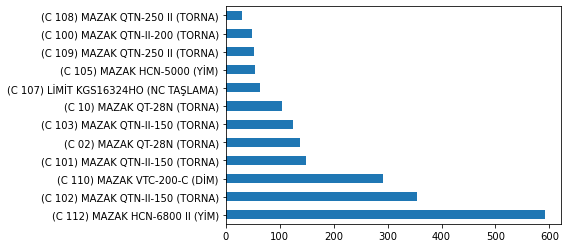

In [14]:
df["Makine"].value_counts().plot.barh()

# sayısal columnların betimsel istatistik

In [15]:
df.describe()

,Çalışma Süresi(Dk) Toplam,yıl
count,2000.000000,2000.0
mean,38.580500,2018.0
std,62.070991,0.0
min,1.000000,2018.0
25%,10.000000,2018.0
50%,30.000000,2018.0
75%,59.000000,2018.0
max,1732.000000,2018.0


####df columndan değer seçme, bir makinanın değerlerini yazdırma

In [16]:
df[df["Makine"] == "(C 112) MAZAK HCN-6800 II (YİM)"]

,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
1409,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 07:18,2.01.2018 07:31,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,13,2018,C 112
1410,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 07:37,2.01.2018 07:59,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,22,2018,C 112
1411,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 08:00,2.01.2018 08:05,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,5,2018,C 112
1412,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 08:05,2.01.2018 08:22,ARİF TARIM,(04) ARIZA,(4.1) ELEKTRIK ARIZA,"(4.1.4) SWITCH, SENSOR, PROB",17,2018,C 112
1413,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",5.01.2018 09:10,5.01.2018 09:59,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,49,2018,C 112
...,...,...,...,...,...,...,...,...,...,...,...
1995,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 16:41,18.12.2018 16:59,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,18,2018,C 112
1996,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:00,18.12.2018 17:36,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,36,2018,C 112
1997,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:36,18.12.2018 17:37,ARİF TARIM,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.2) KAPI, SAC, COVER",1,2018,C 112
1998,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:57,18.12.2018 17:58,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,1,2018,C 112


# seçilen colum üzerinde verilerin incelenmesi

In [17]:
df[(df["Makine"] == "(C 112) MAZAK HCN-6800 II (YİM)") & (df["Personel"] == "CAN ALBAYRAK")]

,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
1409,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 07:18,2.01.2018 07:31,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,13,2018,C 112
1410,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 07:37,2.01.2018 07:59,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,22,2018,C 112
1411,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",2.01.2018 08:00,2.01.2018 08:05,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,5,2018,C 112
1413,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",5.01.2018 09:10,5.01.2018 09:59,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,49,2018,C 112
1414,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",5.01.2018 10:00,5.01.2018 10:13,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,13,2018,C 112
1423,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",15.01.2018 20:09,15.01.2018 20:29,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,20,2018,C 112
1425,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",17.01.2018 16:34,17.01.2018 16:42,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,8,2018,C 112
1427,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.01.2018 19:24,18.01.2018 19:32,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,8,2018,C 112
1438,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",24.01.2018 08:17,24.01.2018 08:28,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,11,2018,C 112
1440,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",24.01.2018 11:02,24.01.2018 11:12,CAN ALBAYRAK,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,10,2018,C 112


In [18]:
df[(df["Makine"] == "(C 112) MAZAK HCN-6800 II (YİM)") & (df["Personel"] == "CAN ALBAYRAK")][("Personel")].value_counts()

CAN ALBAYRAK    32
Name: Personel, dtype: int64

In [19]:
df_ayri=df[(df["Makine"] == "(C 112) MAZAK HCN-6800 II (YİM)") & (df["Personel"] == "CAN ALBAYRAK")]

In [20]:
df_ayri[("Personel")].value_counts()

CAN ALBAYRAK    32
Name: Personel, dtype: int64

In [21]:
df.shape                                                             

(2000, 11)

In [22]:
df["Personel"].value_counts(["Çalışma Süresi(Dk) Toplam"])

ARİF TARIM         0.1455
ELMAS URAK         0.1255
MEHMET AKA         0.0825
GÖKHAN GÖK         0.0580
UMUT DEMİR         0.0555
                    ...  
MURAT BOZER        0.0005
SERCAN EMRE        0.0005
HAYDAR KILIÇ       0.0005
MÜSLÜM GENÇOGLU    0.0005
OSMAN BULUT        0.0005
Name: Personel, Length: 78, dtype: float64

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('bakimdurusanalizyapilacak.csv', delimiter=';', skiprows=0, low_memory=False) 

<AxesSubplot:xlabel='Çalışma Süresi(Dk) Toplam', ylabel='Count'>

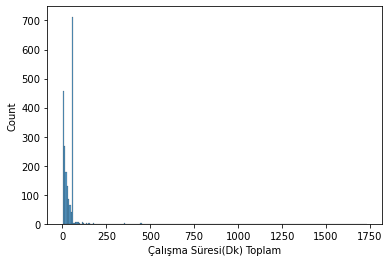

In [25]:
sns.histplot(df["Çalışma Süresi(Dk) Toplam"])

In [26]:
uniqmakineler=df["Makine"].unique()

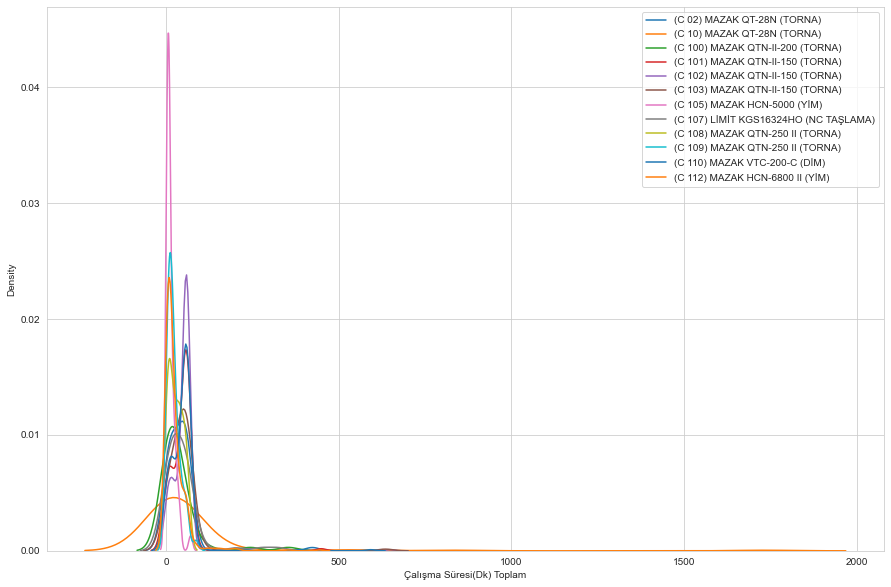

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10)) #boyut ayarı
for makine in uniqmakineler:
    data= df[df["Makine"] == makine]["Çalışma Süresi(Dk) Toplam"]
    sns.kdeplot(data)
    plt.legend(uniqmakineler) #renklerin karşılıkları

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10)) #boyut ayarı
for makine in uniqmakineler:
    data= df[df["Makine"] == makine]["Çalışma Süresi(Dk) Toplam"]
    data_ort=df[df["Makine"] == makine]["Çalışma Süresi(Dk) Toplam"].mean()
    

<Figure size 1080x720 with 0 Axes>

In [29]:
uniqmakineler

array(['(C 02) MAZAK QT-28N (TORNA)', '(C 10) MAZAK QT-28N (TORNA)',
       '(C 100) MAZAK QTN-II-200 (TORNA)',
       '(C 101) MAZAK QTN-II-150 (TORNA)',
       '(C 102) MAZAK QTN-II-150 (TORNA)',
       '(C 103) MAZAK QTN-II-150 (TORNA)', '(C 105) MAZAK HCN-5000 (YİM)',
       '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)',
       '(C 108) MAZAK QTN-250 II (TORNA)',
       '(C 109) MAZAK QTN-250 II (TORNA)',
       '(C 110) MAZAK VTC-200-C (DİM)', '(C 112) MAZAK HCN-6800 II (YİM)'],
      dtype=object)

In [30]:
df

,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
0,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 03:52,12.01.2018 03:59,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,7,2018,C 02
1,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:00,12.01.2018 04:02,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,2,2018,C 02
2,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:02,12.01.2018 04:22,GÖKHAN GÖK,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK",20,2018,C 02
3,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,5.02.2018 23:40,5.02.2018 23:57,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,17,2018,C 02
4,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,30.03.2018 14:22,30.03.2018 14:33,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,11,2018,C 02
...,...,...,...,...,...,...,...,...,...,...,...
1995,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 16:41,18.12.2018 16:59,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,18,2018,C 112
1996,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:00,18.12.2018 17:36,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,36,2018,C 112
1997,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:36,18.12.2018 17:37,ARİF TARIM,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.2) KAPI, SAC, COVER",1,2018,C 112
1998,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:57,18.12.2018 17:58,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,1,2018,C 112


In [31]:
for x in df:
       print(x)
            

Makine
Stok kodu
Başlangıç Tarih
Bitiş Tarih
Personel
Arıza Grup 1
Arıza Grup 2
Arıza Grup 3
Çalışma Süresi(Dk) Toplam
yıl
tezgah


In [83]:
makinesüreler=[]
for y in uniqmakineler:
    sum = 0
    for x in range(len(df)):
        if df.iloc[x]["Makine"] == y:
            sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]
    makinesüreler.append([sum,y])                  
    print(y , " toplam duruş süresi: ", sum )
    

#makinesüreler.sort(reverse = True)


max(makinesüreler)

(C 02) MAZAK QT-28N (TORNA)  toplam duruş süresi:  5762
(C 10) MAZAK QT-28N (TORNA)  toplam duruş süresi:  6409
(C 100) MAZAK QTN-II-200 (TORNA)  toplam duruş süresi:  1753
(C 101) MAZAK QTN-II-150 (TORNA)  toplam duruş süresi:  6787
(C 102) MAZAK QTN-II-150 (TORNA)  toplam duruş süresi:  17445
(C 103) MAZAK QTN-II-150 (TORNA)  toplam duruş süresi:  5781
(C 105) MAZAK HCN-5000 (YİM)  toplam duruş süresi:  677
(C 107) LİMİT KGS16324HO (NC TAŞLAMA)  toplam duruş süresi:  2887
(C 108) MAZAK QTN-250 II (TORNA)  toplam duruş süresi:  833
(C 109) MAZAK QTN-250 II (TORNA)  toplam duruş süresi:  1156
(C 110) MAZAK VTC-200-C (DİM)  toplam duruş süresi:  13416
(C 112) MAZAK HCN-6800 II (YİM)  toplam duruş süresi:  14255


[17445, '(C 102) MAZAK QTN-II-150 (TORNA)']

In [84]:
makinesüreler.sort(reverse = True) 
makinesüreler

[[17445, '(C 102) MAZAK QTN-II-150 (TORNA)'],
 [14255, '(C 112) MAZAK HCN-6800 II (YİM)'],
 [13416, '(C 110) MAZAK VTC-200-C (DİM)'],
 [6787, '(C 101) MAZAK QTN-II-150 (TORNA)'],
 [6409, '(C 10) MAZAK QT-28N (TORNA)'],
 [5781, '(C 103) MAZAK QTN-II-150 (TORNA)'],
 [5762, '(C 02) MAZAK QT-28N (TORNA)'],
 [2887, '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)'],
 [1753, '(C 100) MAZAK QTN-II-200 (TORNA)'],
 [1156, '(C 109) MAZAK QTN-250 II (TORNA)'],
 [833, '(C 108) MAZAK QTN-250 II (TORNA)'],
 [677, '(C 105) MAZAK HCN-5000 (YİM)']]

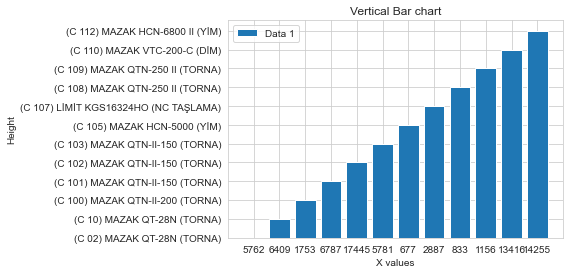

In [33]:

data = np.array(makinesüreler)


plt.bar(data[:,0], data[:,1],label="Data 1")
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('X values')
plt.ylabel('Height')
plt.title('Vertical Bar chart')

plt.show()

In [34]:
print(df.iloc[3]["Makine"])

(C 02) MAZAK QT-28N (TORNA)


In [35]:
#stok kodlarıyla her parçayı ayrı kaydettim
uniqparcalar=df["Stok kodu"].unique()

In [36]:
#her ÜRETİLEN parçanın ne kadar durduğu bilgisi 
uretilenparcadurus= []
for y in uniqparcalar:
    sum = 0
    for x in range(len(df)):
        if df.iloc[x]["Stok kodu"] == y:
            sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]
    uretilenparcadurus.append([sum,y])        
    print(y , " toplam çalışma süresi: ", sum)


001-0827-00000000030  toplam çalışma süresi:  4816
001-0616-02000000030  toplam çalışma süresi:  946
501-0639-02000000010  toplam çalışma süresi:  1173
501-0639-00000000010  toplam çalışma süresi:  4199
001-0789-01000000010  toplam çalışma süresi:  1037
007-0631-00000000040  toplam çalışma süresi:  115
007-0587-00000000040  toplam çalışma süresi:  86
007-0514-00000000040  toplam çalışma süresi:  435
007-0477-00000000040  toplam çalışma süresi:  7380
007-0428-00000000041  toplam çalışma süresi:  27
007-0394-01000000040  toplam çalışma süresi:  355
007-0367-00000000040  toplam çalışma süresi:  79
007-0363-00000000042  toplam çalışma süresi:  103
007-0355-02000000040  toplam çalışma süresi:  38
007-0344-03000000041  toplam çalışma süresi:  155
007-0344-02000000041  toplam çalışma süresi:  54
007-0344-00000000041  toplam çalışma süresi:  1031
007-0609-00000000032  toplam çalışma süresi:  3253
007-0521-00000000031  toplam çalışma süresi:  67
007-0473-00000000030  toplam çalışma süresi:  405

In [63]:
uretilenparcadurus.sort(reverse = True)
uretilenparcadurus

[[14255, '9,13E+19'],
 [7380, '007-0477-00000000040'],
 [7136, '1525503740000000D211'],
 [6490, '007-0473-00000000040'],
 [5791, '1,53E+19'],
 [4816, '001-0827-00000000030'],
 [4199, '501-0639-00000000010'],
 [4052, '007-0473-00000000030'],
 [3253, '007-0609-00000000032'],
 [1396, '007-0352-04000000030'],
 [1327, '007-0352-04000000040'],
 [1248, '007-0464-01000000030'],
 [1248, '007-0428-00000000031'],
 [1173, '501-0639-02000000010'],
 [1098, '007-0359-02000000040'],
 [1037, '001-0789-01000000010'],
 [1031, '007-0344-00000000041'],
 [959, '007-0514-00000000100'],
 [946, '001-0616-02000000030'],
 [870, '007-0344-03000000101'],
 [531, '007-0359-02000000030'],
 [493, '001-0726-00000000010'],
 [489, 'R9170080200000000030'],
 [435, '007-0514-00000000040'],
 [398, '001-0807-04000000055'],
 [355, '007-0394-01000000040'],
 [341, '007-0473-00000000100'],
 [322, '007-0344-03000000031'],
 [320, 'F00BC200600000000070'],
 [296, '007-0355-02000000030'],
 [279, '001-0791-00000000010'],
 [207, '007-03

In [38]:
#her personelin ayrı kaydı
uniqpersoneller=df["Personel"].unique()

In [64]:
#her personelin ne kadar durduğu bilgisi 
personelsüreler=[]
for y in uniqpersoneller:
    sum = 0
    for x in range(len(df)):
        
        if df.iloc[x]["Personel"] == y:
            sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]
            
    personelsüreler.append([sum,y])
    print(y , " toplam çalışma süresi: ", sum)
    
personelsüreler.sort(reverse = True)    
personelsüreler

ALI RIZA EREN  toplam çalışma süresi:  221
GÖKHAN GÖK  toplam çalışma süresi:  4881
ARİF TARIM  toplam çalışma süresi:  16964
MURAT TILKI  toplam çalışma süresi:  255
ERKAN SAHIN  toplam çalışma süresi:  204
MEHMET AKA  toplam çalışma süresi:  7501
İLYAS ÖZ  toplam çalışma süresi:  4204
UMUT DEMİR  toplam çalışma süresi:  5456
İBRAHİM HALİL SALMAN  toplam çalışma süresi:  2044
LEVENT DEMİR  toplam çalışma süresi:  299
DURSUN ARIK  toplam çalışma süresi:  994
KEMAL DEMİR  toplam çalışma süresi:  8004
ÖZDEN ÇELIK  toplam çalışma süresi:  316
KEMAL ILDEMIR  toplam çalışma süresi:  66
HÜSEYİN ÇETİN  toplam çalışma süresi:  131
CUMHUR ALTIN  toplam çalışma süresi:  2176
ELMAS URAK  toplam çalışma süresi:  11664
GÜRKAN ÇETINER  toplam çalışma süresi:  580
ZAFER ÇINAR  toplam çalışma süresi:  714
MAHMUT KIYMIK  toplam çalışma süresi:  305
MEHMET YASAR TASÇI  toplam çalışma süresi:  457
MUSTAFA ŞEKER  toplam çalışma süresi:  49
MÜSLÜM GENÇOGLU  toplam çalışma süresi:  1
MUSTAFA GÜNGÖR  toplam 

[[16964, 'ARİF TARIM'],
 [11664, 'ELMAS URAK'],
 [8004, 'KEMAL DEMİR'],
 [7501, 'MEHMET AKA'],
 [5456, 'UMUT DEMİR'],
 [4881, 'GÖKHAN GÖK'],
 [4204, 'İLYAS ÖZ'],
 [2176, 'CUMHUR ALTIN'],
 [2044, 'İBRAHİM HALİL SALMAN'],
 [1771, 'NEVZAT CANPOLAT'],
 [1326, 'FATİH AKYOL'],
 [1143, 'GÖKAN BİRİNCİ'],
 [994, 'DURSUN ARIK'],
 [714, 'ZAFER ÇINAR'],
 [666, 'İBRAHİM MERCAN'],
 [580, 'GÜRKAN ÇETINER'],
 [457, 'MEHMET YASAR TASÇI'],
 [396, 'CAN ALBAYRAK'],
 [361, 'OZGUR SAMURCU'],
 [320, 'MEHMET ÇETIN'],
 [316, 'ÖZDEN ÇELIK'],
 [305, 'MAHMUT KIYMIK'],
 [299, 'LEVENT DEMİR'],
 [291, 'MEHMET UZUNOGLU'],
 [255, 'MURAT TILKI'],
 [254, 'HÜSEYIN KORKMAZ'],
 [224, 'MUSTAFA GÜNGÖR'],
 [221, 'ALI RIZA EREN'],
 [211, 'TEOMAN ÇORBACI'],
 [204, 'ERKAN SAHIN'],
 [199, 'MEHMET ERTUGRUL'],
 [184, 'SEFA CULFA'],
 [180, 'ESREF BÜYÜKULU'],
 [173, 'FATIH AKKIRAN'],
 [167, 'YÜKSEL TANER'],
 [152, 'İLKER SACÇI'],
 [139, 'HAŞİM GÜNTAŞ'],
 [131, 'HÜSEYİN ÇETİN'],
 [128, 'UFUK EŞME'],
 [126, 'HİDAYET KAHRAMAN'],
 [102, 

In [65]:
 #En çok problem çıkaran makine ile personeller
personelmakineanaliz=[]
for y in uniqpersoneller:
    sum = 0
    for x in range(len(df)):

            if (df.iloc[x]["Personel"] == y): 
                if(df.iloc[x]["Makine"] == makinesüreler[0][1]):
                    sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]
    if sum!=0 :
        personelmakineanaliz.append([sum,y])
        print(y , " toplam çalışma süresi: ", sum)

    
    

ALI RIZA EREN  toplam çalışma süresi:  154
GÖKHAN GÖK  toplam çalışma süresi:  810
ARİF TARIM  toplam çalışma süresi:  1046
MURAT TILKI  toplam çalışma süresi:  243
ERKAN SAHIN  toplam çalışma süresi:  204
MEHMET AKA  toplam çalışma süresi:  910
İLYAS ÖZ  toplam çalışma süresi:  1043
UMUT DEMİR  toplam çalışma süresi:  233
İBRAHİM HALİL SALMAN  toplam çalışma süresi:  81
LEVENT DEMİR  toplam çalışma süresi:  106
DURSUN ARIK  toplam çalışma süresi:  56
KEMAL DEMİR  toplam çalışma süresi:  876


In [66]:
personelmakineanaliz.sort(reverse = True)
personelmakineanaliz


[[1046, 'ARİF TARIM'],
 [1043, 'İLYAS ÖZ'],
 [910, 'MEHMET AKA'],
 [876, 'KEMAL DEMİR'],
 [810, 'GÖKHAN GÖK'],
 [243, 'MURAT TILKI'],
 [233, 'UMUT DEMİR'],
 [204, 'ERKAN SAHIN'],
 [154, 'ALI RIZA EREN'],
 [106, 'LEVENT DEMİR'],
 [81, 'İBRAHİM HALİL SALMAN'],
 [56, 'DURSUN ARIK']]

### En çok problem çıkaran makine ile hangi personelin çalıştığı verilerinin analizi

In [42]:
#En çok problem çıkaran makine ile hangi personelin çalıştığı verilerinin analizi
personelmakineanaliz[0][1]


'ARİF TARIM'

# hangi makinede hangi arıza


In [67]:
#arızaların ayrımı
uniqarizalar=df["Arıza Grup 2"].unique()
uniqarizalar

array(['(4.7) BAKIMCI BEKLEME', '(4.2) MEKANIK ARIZA',
       '(4.1) ELEKTRIK ARIZA', '(4.3) HIDROLIK ARIZA',
       '(4.8) GENEL KOMPRESÖR ARIZASI', '(4.10) BAKIM MALZEME BEKLEME',
       '(4.4) PNOMATIK ARIZA', '(4.9) TEZGAH REVİZYON', '(4.5) SOGUTMA',
       '(4.6) OPERATÖR'], dtype=object)

### en çok duruşa sebep olan arıza

In [68]:
    arizasureler=[]
    for k in uniqmakineler:
    
        
        i=1
        
        for y in uniqarizalar:
            sum = 0
            for x in range(len(df)):
                if (df.iloc[x]["Makine"] == k and df.iloc[x]["Arıza Grup 2"] == y): 
                    sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]
             
            
            print(k, y ,sum)
            arizasureler.append([sum,y,k]) 
        print("\n")

       

(C 02) MAZAK QT-28N (TORNA) (4.7) BAKIMCI BEKLEME 645
(C 02) MAZAK QT-28N (TORNA) (4.2) MEKANIK ARIZA 3933
(C 02) MAZAK QT-28N (TORNA) (4.1) ELEKTRIK ARIZA 180
(C 02) MAZAK QT-28N (TORNA) (4.3) HIDROLIK ARIZA 206
(C 02) MAZAK QT-28N (TORNA) (4.8) GENEL KOMPRESÖR ARIZASI 371
(C 02) MAZAK QT-28N (TORNA) (4.10) BAKIM MALZEME BEKLEME 427
(C 02) MAZAK QT-28N (TORNA) (4.4) PNOMATIK ARIZA 0
(C 02) MAZAK QT-28N (TORNA) (4.9) TEZGAH REVİZYON 0
(C 02) MAZAK QT-28N (TORNA) (4.5) SOGUTMA 0
(C 02) MAZAK QT-28N (TORNA) (4.6) OPERATÖR 0


(C 10) MAZAK QT-28N (TORNA) (4.7) BAKIMCI BEKLEME 592
(C 10) MAZAK QT-28N (TORNA) (4.2) MEKANIK ARIZA 4789
(C 10) MAZAK QT-28N (TORNA) (4.1) ELEKTRIK ARIZA 455
(C 10) MAZAK QT-28N (TORNA) (4.3) HIDROLIK ARIZA 154
(C 10) MAZAK QT-28N (TORNA) (4.8) GENEL KOMPRESÖR ARIZASI 419
(C 10) MAZAK QT-28N (TORNA) (4.10) BAKIM MALZEME BEKLEME 0
(C 10) MAZAK QT-28N (TORNA) (4.4) PNOMATIK ARIZA 0
(C 10) MAZAK QT-28N (TORNA) (4.9) TEZGAH REVİZYON 0
(C 10) MAZAK QT-28N (TORNA) (4.5)

In [69]:
arizasureler2=[]
        
i=1

for y in uniqarizalar:
    sum = 0
    for x in range(len(df)):
        if ( df.iloc[x]["Arıza Grup 2"] == y): 
            sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]


    print(k, y ,sum)
    arizasureler2.append([sum,y]) 
print("\n")

(C 112) MAZAK HCN-6800 II (YİM) (4.7) BAKIMCI BEKLEME 10649
(C 112) MAZAK HCN-6800 II (YİM) (4.2) MEKANIK ARIZA 32715
(C 112) MAZAK HCN-6800 II (YİM) (4.1) ELEKTRIK ARIZA 15208
(C 112) MAZAK HCN-6800 II (YİM) (4.3) HIDROLIK ARIZA 747
(C 112) MAZAK HCN-6800 II (YİM) (4.8) GENEL KOMPRESÖR ARIZASI 3101
(C 112) MAZAK HCN-6800 II (YİM) (4.10) BAKIM MALZEME BEKLEME 12899
(C 112) MAZAK HCN-6800 II (YİM) (4.4) PNOMATIK ARIZA 43
(C 112) MAZAK HCN-6800 II (YİM) (4.9) TEZGAH REVİZYON 187
(C 112) MAZAK HCN-6800 II (YİM) (4.5) SOGUTMA 1530
(C 112) MAZAK HCN-6800 II (YİM) (4.6) OPERATÖR 82




In [70]:
arizasureler2.sort(reverse = True)

print("en çok duruşa sebep olan arıza : ", arizasureler2[0])
arizasureler2

en çok duruşa sebep olan arıza :  [32715, '(4.2) MEKANIK ARIZA']


[[32715, '(4.2) MEKANIK ARIZA'],
 [15208, '(4.1) ELEKTRIK ARIZA'],
 [12899, '(4.10) BAKIM MALZEME BEKLEME'],
 [10649, '(4.7) BAKIMCI BEKLEME'],
 [3101, '(4.8) GENEL KOMPRESÖR ARIZASI'],
 [1530, '(4.5) SOGUTMA'],
 [747, '(4.3) HIDROLIK ARIZA'],
 [187, '(4.9) TEZGAH REVİZYON'],
 [82, '(4.6) OPERATÖR'],
 [43, '(4.4) PNOMATIK ARIZA']]

In [71]:
arizasureler.sort(reverse = True)
arizasureler

[[9815, '(4.2) MEKANIK ARIZA', '(C 102) MAZAK QTN-II-150 (TORNA)'],
 [7910, '(4.10) BAKIM MALZEME BEKLEME', '(C 110) MAZAK VTC-200-C (DİM)'],
 [5978, '(4.2) MEKANIK ARIZA', '(C 112) MAZAK HCN-6800 II (YİM)'],
 [4789, '(4.2) MEKANIK ARIZA', '(C 10) MAZAK QT-28N (TORNA)'],
 [4123, '(4.7) BAKIMCI BEKLEME', '(C 112) MAZAK HCN-6800 II (YİM)'],
 [4111, '(4.1) ELEKTRIK ARIZA', '(C 102) MAZAK QTN-II-150 (TORNA)'],
 [3933, '(4.2) MEKANIK ARIZA', '(C 02) MAZAK QT-28N (TORNA)'],
 [3868, '(4.2) MEKANIK ARIZA', '(C 103) MAZAK QTN-II-150 (TORNA)'],
 [3379, '(4.1) ELEKTRIK ARIZA', '(C 101) MAZAK QTN-II-150 (TORNA)'],
 [2745, '(4.1) ELEKTRIK ARIZA', '(C 112) MAZAK HCN-6800 II (YİM)'],
 [2571, '(4.10) BAKIM MALZEME BEKLEME', '(C 101) MAZAK QTN-II-150 (TORNA)'],
 [2353, '(4.2) MEKANIK ARIZA', '(C 110) MAZAK VTC-200-C (DİM)'],
 [1991, '(4.10) BAKIM MALZEME BEKLEME', '(C 102) MAZAK QTN-II-150 (TORNA)'],
 [1461, '(4.2) MEKANIK ARIZA', '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)'],
 [1234, '(4.7) BAKIMCI BEKLEME

# En çok duruş süresine sahip makinenin hangi parçasında en çok arıza çıkıyor değerlendirmesi.

In [72]:
#arıza parçaların ayrımı
uniqarizaparcalari=df["Arıza Grup 3"].unique()
uniqarizaparcalari

array([nan, '(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK', '(4.2.6) TURRET',
       '(4.1.4) SWITCH, SENSOR, PROB', '(4.1.9) MUHTELIF ELEKTRIK',
       '(4.2.12) MUHTELIF MEKANIK', '(4.3.3) HORTUM',
       '(4.1.2) ELEKTRONIK KART', '(4.10.1) TEZGAHA PARÇA BEKLENİYOR',
       '(4.1.7) PARAMETRE, INITIALIZE', '(4.2.4) SPINDLE',
       '(4.2.8) VIDALI MIL', '(4.2.10) YAGLAMA', '(4.1.3) FAN',
       '(4.4.1) VALF', '(4.3.5) YAG EKSIKLIGI', '(4.1.6) MOTOR',
       '(4.1.5) CETVEL, ENCODER', '(4.2.5) TABLA, PALET',
       '(4.2.11) KONVEYÖR', '(4.2.9) KIZAK', '(4.5.4) MUHTELIF',
       '(4.2.7) MAGAZIN, ATC', '(4.5.3) FILTRE', '(4.5.2) BORYAG',
       '(4.1.8) ELK. PANO IÇI ASIRI SICAKLIGI',
       '(4.3.2) POMPA, O-RING, KEÇE, CONTA', '(4.2.2) KAPI, SAC, COVER',
       '(4.1.10) ELEKTRİK KESİNTİSİ/DALGALANMASI',
       '(4.6.6) KAPI,SAC,COVER', '(4.6.10) PARAMETRE,KUMANDA,PROGRAM',
       '(4.3.6) MUHTELIF HIDROLIK MALZEME', '(4.3.1) VALF',
       '(4.4.2) HORTUM', '(4.1.1) ELEKTRIK KOMPONENT,

In [73]:
    arizaparcalar=[]
    
    i=1

    for y in uniqarizaparcalari:
        sum = 0
        for x in range(len(df)):
            if (df.iloc[x]["Arıza Grup 3"] == y ): 
                 if(df.iloc[x]["Makine"] == makinesüreler[0][1]):
                    sum += df.iloc[x]["Çalışma Süresi(Dk) Toplam"]

        if (sum !=0):
            arizaparcalar.append([sum,y]) 
            print(k, y ,"-------",sum)

    print("\n")

(C 112) MAZAK HCN-6800 II (YİM) (4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK ------- 1121
(C 112) MAZAK HCN-6800 II (YİM) (4.2.6) TURRET ------- 2719
(C 112) MAZAK HCN-6800 II (YİM) (4.1.4) SWITCH, SENSOR, PROB ------- 87
(C 112) MAZAK HCN-6800 II (YİM) (4.1.9) MUHTELIF ELEKTRIK ------- 46
(C 112) MAZAK HCN-6800 II (YİM) (4.2.12) MUHTELIF MEKANIK ------- 93
(C 112) MAZAK HCN-6800 II (YİM) (4.3.3) HORTUM ------- 206
(C 112) MAZAK HCN-6800 II (YİM) (4.1.2) ELEKTRONIK KART ------- 47
(C 112) MAZAK HCN-6800 II (YİM) (4.10.1) TEZGAHA PARÇA BEKLENİYOR ------- 427




In [74]:
arizaparcalar.sort(reverse = True)
arizaparcalar

[[2719, '(4.2.6) TURRET'],
 [1121, '(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK'],
 [427, '(4.10.1) TEZGAHA PARÇA BEKLENİYOR'],
 [206, '(4.3.3) HORTUM'],
 [93, '(4.2.12) MUHTELIF MEKANIK'],
 [87, '(4.1.4) SWITCH, SENSOR, PROB'],
 [47, '(4.1.2) ELEKTRONIK KART'],
 [46, '(4.1.9) MUHTELIF ELEKTRIK']]

In [75]:
# En çok duruş süresine sahip makinenin en çok arıza ÇIKARAN PARÇASI
arizaparcalar[0]

[2719, '(4.2.6) TURRET']

# DATABASE BAĞLANMA

In [76]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [77]:
import psycopg2

In [78]:
db = psycopg2.connect(user = "postgres",
                      password = "Semafor4.",
                      host = "192.168.1.51",
                      port = "5432",
                      database = "totomakv2")
print ("Opened database successfully")

Opened database successfully


In [79]:

#Veritabanı bağlantısı ile komutlarımızı gönderebilmek için aracı bir imleç oluşturmamız gerekiyor. İmleç oluşturmak için aşağıdaki kodları kullanabilirsiniz.
imlec = db.cursor()


In [80]:
#Buraya kadar olan işlemlerin doğruluğunu test etmek için aşağıdaki komut ile bağlantı bilgilerimizi ekrana yazdıralım.

print( db.get_dsn_parameters() )

{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'totomakv2', 'host': '192.168.1.51', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [81]:
komut_CREATE = """ CREATE TABLE makinesüreler(
                id SERIAL PRIMARY KEY,
                makineadi TEXT NOT NULL,
                durussuresi INT NOT NULL
                );
                """

imlec.execute(komut_CREATE)
db.commit()
#Burada SQL komutumuzu yazdıktan sonra execute() fonksiyonu ile çalıştırıyoruz ve değişikliklerin veritabanı üzerinde de yapılması için commit() fonksiyonu ile işlemi tamamlıyoruz.

In [85]:
makinesüreler

[[17445, '(C 102) MAZAK QTN-II-150 (TORNA)'],
 [14255, '(C 112) MAZAK HCN-6800 II (YİM)'],
 [13416, '(C 110) MAZAK VTC-200-C (DİM)'],
 [6787, '(C 101) MAZAK QTN-II-150 (TORNA)'],
 [6409, '(C 10) MAZAK QT-28N (TORNA)'],
 [5781, '(C 103) MAZAK QTN-II-150 (TORNA)'],
 [5762, '(C 02) MAZAK QT-28N (TORNA)'],
 [2887, '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)'],
 [1753, '(C 100) MAZAK QTN-II-200 (TORNA)'],
 [1156, '(C 109) MAZAK QTN-250 II (TORNA)'],
 [833, '(C 108) MAZAK QTN-250 II (TORNA)'],
 [677, '(C 105) MAZAK HCN-5000 (YİM)']]

In [86]:
i=0
for süre in makinesüreler:
    komut_INSERT = f"INSERT INTO makinesüreler(makineadi,durussuresi) VALUES('{süre[1]}',{süre[0]});"
    imlec.execute(komut_INSERT)
    db.commit()
print ("Records created successfully")

Records created successfully


In [100]:
#hatalı yazdığım tamamlanamayan database komutlarını siliyor
rb="ROLLBACK;"

imlec.execute(rb)
db.commit()

In [88]:

imlec.execute("INSERT INTO makinesüreler(makineadi,durussuresi) VALUES('iğp',456);")
db.commit()
print ("Records created successfully")

Records created successfully


# parçalar için tablo

In [89]:
komut_CREATE = """ CREATE TABLE parcasüreler(
                id SERIAL PRIMARY KEY,
                parcaadi TEXT NOT NULL,
                durussuresi INT NOT NULL
                );
                """

imlec.execute(komut_CREATE)
db.commit()
print ("Tablo oluşturuldu")

DuplicateTable: relation "parcasüreler" already exists


In [90]:
#makine parçaları ve süreleri tabloya yazdırma
arizaparcalar

[[2719, '(4.2.6) TURRET'],
 [1121, '(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK'],
 [427, '(4.10.1) TEZGAHA PARÇA BEKLENİYOR'],
 [206, '(4.3.3) HORTUM'],
 [93, '(4.2.12) MUHTELIF MEKANIK'],
 [87, '(4.1.4) SWITCH, SENSOR, PROB'],
 [47, '(4.1.2) ELEKTRONIK KART'],
 [46, '(4.1.9) MUHTELIF ELEKTRIK']]

In [91]:

for süre in arizaparcalar:
    komut_INSERT = f"INSERT INTO parcasüreler(parcaadi,durussuresi) VALUES('{süre[1]}',{süre[0]});"
    imlec.execute(komut_INSERT)
    db.commit()
print ("Records created successfully")

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


# personeller ve arıza süreleri için tablo

In [93]:
komut_CREATE = """ CREATE TABLE personelsüreler(
                id SERIAL PRIMARY KEY,
                personeladi TEXT NOT NULL,
                durussuresi INT NOT NULL
                );
                """

imlec.execute(komut_CREATE)
db.commit()
print ("Tablo oluşturuldu")

Tablo oluşturuldu


In [94]:
personelsüreler

[[16964, 'ARİF TARIM'],
 [11664, 'ELMAS URAK'],
 [8004, 'KEMAL DEMİR'],
 [7501, 'MEHMET AKA'],
 [5456, 'UMUT DEMİR'],
 [4881, 'GÖKHAN GÖK'],
 [4204, 'İLYAS ÖZ'],
 [2176, 'CUMHUR ALTIN'],
 [2044, 'İBRAHİM HALİL SALMAN'],
 [1771, 'NEVZAT CANPOLAT'],
 [1326, 'FATİH AKYOL'],
 [1143, 'GÖKAN BİRİNCİ'],
 [994, 'DURSUN ARIK'],
 [714, 'ZAFER ÇINAR'],
 [666, 'İBRAHİM MERCAN'],
 [580, 'GÜRKAN ÇETINER'],
 [457, 'MEHMET YASAR TASÇI'],
 [396, 'CAN ALBAYRAK'],
 [361, 'OZGUR SAMURCU'],
 [320, 'MEHMET ÇETIN'],
 [316, 'ÖZDEN ÇELIK'],
 [305, 'MAHMUT KIYMIK'],
 [299, 'LEVENT DEMİR'],
 [291, 'MEHMET UZUNOGLU'],
 [255, 'MURAT TILKI'],
 [254, 'HÜSEYIN KORKMAZ'],
 [224, 'MUSTAFA GÜNGÖR'],
 [221, 'ALI RIZA EREN'],
 [211, 'TEOMAN ÇORBACI'],
 [204, 'ERKAN SAHIN'],
 [199, 'MEHMET ERTUGRUL'],
 [184, 'SEFA CULFA'],
 [180, 'ESREF BÜYÜKULU'],
 [173, 'FATIH AKKIRAN'],
 [167, 'YÜKSEL TANER'],
 [152, 'İLKER SACÇI'],
 [139, 'HAŞİM GÜNTAŞ'],
 [131, 'HÜSEYİN ÇETİN'],
 [128, 'UFUK EŞME'],
 [126, 'HİDAYET KAHRAMAN'],
 [102, 

In [95]:

for süre in personelsüreler:
    komut_INSERT = f"INSERT INTO personelsüreler(personeladi,durussuresi) VALUES('{süre[1]}',{süre[0]});"
    imlec.execute(komut_INSERT)
    db.commit()
print ("Records created successfully")

Records created successfully


# ÜRETİLEN PARÇALARIN YARATTIĞI DURUŞ SÜRELERİ İÇİN TABLO 

In [96]:
uretilenparcadurus

[[14255, '9,13E+19'],
 [7380, '007-0477-00000000040'],
 [7136, '1525503740000000D211'],
 [6490, '007-0473-00000000040'],
 [5791, '1,53E+19'],
 [4816, '001-0827-00000000030'],
 [4199, '501-0639-00000000010'],
 [4052, '007-0473-00000000030'],
 [3253, '007-0609-00000000032'],
 [1396, '007-0352-04000000030'],
 [1327, '007-0352-04000000040'],
 [1248, '007-0464-01000000030'],
 [1248, '007-0428-00000000031'],
 [1173, '501-0639-02000000010'],
 [1098, '007-0359-02000000040'],
 [1037, '001-0789-01000000010'],
 [1031, '007-0344-00000000041'],
 [959, '007-0514-00000000100'],
 [946, '001-0616-02000000030'],
 [870, '007-0344-03000000101'],
 [531, '007-0359-02000000030'],
 [493, '001-0726-00000000010'],
 [489, 'R9170080200000000030'],
 [435, '007-0514-00000000040'],
 [398, '001-0807-04000000055'],
 [355, '007-0394-01000000040'],
 [341, '007-0473-00000000100'],
 [322, '007-0344-03000000031'],
 [320, 'F00BC200600000000070'],
 [296, '007-0355-02000000030'],
 [279, '001-0791-00000000010'],
 [207, '007-03

In [101]:
komut_CREATE = """ CREATE TABLE uretilenparcadurus(
                id SERIAL PRIMARY KEY,
                uretilenparcaadi TEXT NOT NULL,
                durussuresi INT NOT NULL
                );
                """

imlec.execute(komut_CREATE)
db.commit()
print ("Tablo oluşturuldu")

Tablo oluşturuldu


In [102]:
for süre in uretilenparcadurus:
    komut_INSERT = f"INSERT INTO uretilenparcadurus(uretilenparcaadi,durussuresi) VALUES('{süre[1]}',{süre[0]});"
    imlec.execute(komut_INSERT)
    db.commit()
print ("Records created successfully")

Records created successfully
